In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets

In [2]:
diabetes = datasets.load_diabetes()
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [3]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [4]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttps://www4.stat.ncsu.edu/~boos/var.select/diabetes.h

In [5]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [6]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [7]:
df =pd.DataFrame(data=diabetes.data,columns=diabetes.feature_names)
print(df)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
5   -0.092695 -0.044642 -0.040696 -0.019442 -0.068991 -0.079288  0.041277   
6   -0.045472  0.050680 -0.047163 -0.015999 -0.040096 -0.024800  0.000779   
7    0.063504  0.050680 -0.001895  0.066630  0.090620  0.108914  0.022869   
8    0.041708  0.050680  0.061696 -0.040099 -0.013953  0.006202 -0.028674   
9   -0.070900 -0.044642  0.039062 -0.033214 -0.012577 -0.034508 -0.024993   
10  -0.096328 -0.044642 -0.083808  0.008101 -0.103389 -0.090561 -0.013948   
11   0.027178  0.050680  0.017506 -0.033214 -0.007073  0.045972 -0.065491   

In [8]:
df['DiseaseProgression']=diabetes.target
print(df)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
5   -0.092695 -0.044642 -0.040696 -0.019442 -0.068991 -0.079288  0.041277   
6   -0.045472  0.050680 -0.047163 -0.015999 -0.040096 -0.024800  0.000779   
7    0.063504  0.050680 -0.001895  0.066630  0.090620  0.108914  0.022869   
8    0.041708  0.050680  0.061696 -0.040099 -0.013953  0.006202 -0.028674   
9   -0.070900 -0.044642  0.039062 -0.033214 -0.012577 -0.034508 -0.024993   
10  -0.096328 -0.044642 -0.083808  0.008101 -0.103389 -0.090561 -0.013948   
11   0.027178  0.050680  0.017506 -0.033214 -0.007073  0.045972 -0.065491   

In [9]:
df.isnull().sum()

age                   0
sex                   0
bmi                   0
bp                    0
s1                    0
s2                    0
s3                    0
s4                    0
s5                    0
s6                    0
DiseaseProgression    0
dtype: int64

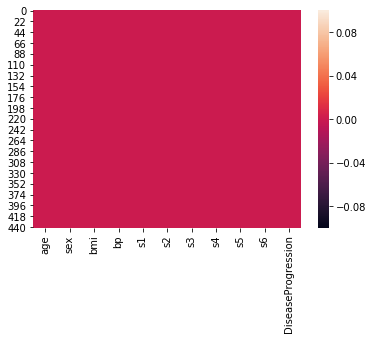

In [10]:
sns.heatmap(df.isnull())

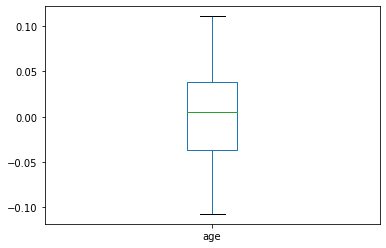

In [11]:
df['age'].plot.box()

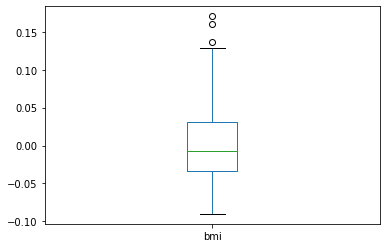

In [12]:
df['bmi'].plot.box()

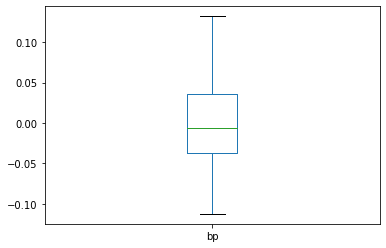

In [13]:
df['bp'].plot.box()

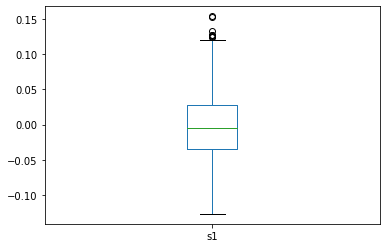

In [14]:
df['s1'].plot.box()

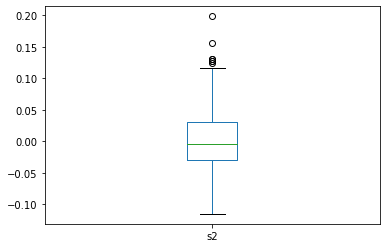

In [15]:
df['s2'].plot.box()

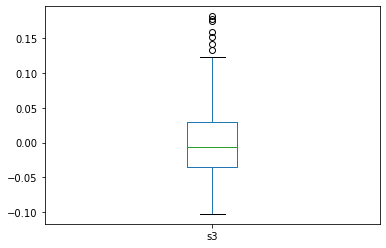

In [16]:
df['s3'].plot.box()

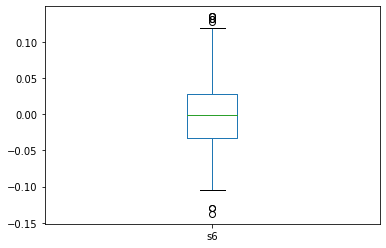

In [17]:
df['s6'].plot.box()

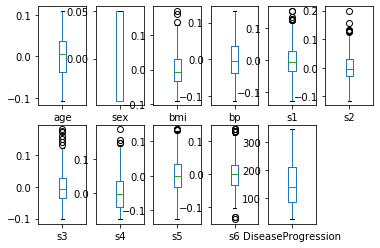

In [18]:
df.plot(kind='box',subplots=True,layout=(2,6))
plt.show()

In [19]:
x=df.iloc[:,0:9]
y=df.iloc[:,-1]

In [20]:
def linreg():
    lm=LinearRegression()
    lm.fit(x,y)
    print('score=',lm.score(x,y))
    print('coefficient=',lm.coef_)
    print('Intercept=',lm.intercept_)

In [21]:
linreg()

score= 0.5165741627954357
coefficient= [  -1.95011999 -235.27756543  530.12170122  334.95496746 -797.29265278
  482.30947471  106.80281901  188.77975399  767.01345961]
Intercept= 152.13348416289648


In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)

In [23]:
x_train.shape

(309, 9)

In [24]:
y_train.shape

(309,)

In [25]:
x_test.shape

(133, 9)

In [26]:
y_test.shape

(133,)

In [27]:
lm=LinearRegression()

In [28]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
lm.coef_

array([ -48.88197321, -190.49547181,  583.64894807,  277.02003893,
       -506.67112345,  243.06015384,  -66.43746892,   93.04429851,
        728.49987515])

In [30]:
lm.intercept_

153.7056546814811

In [31]:
lm.score(x_train,y_train)

0.5537558702925014

In [32]:
pred=lm.predict(x_test)
print("predicted result",pred)
print("actual result",y_test)

predicted result [239.52341718 251.20659338 164.95001678 120.54201156 182.09477886
 261.58631912 112.80781349 192.27597349 152.12684215 238.0421991
 174.06602336 182.28217489 111.8440749   92.91011026 242.19705985
  90.76807317 152.29373208  66.19188193  98.60694019 209.68545329
 196.50031338 162.15517334 165.74701033 157.6279606  208.77498543
 170.38158025 111.79501861  80.62304875 185.53699144 165.06957663
 175.84468835  81.97435261 143.34184756 149.47807788 144.57153575
 193.33203987 166.60510445 189.52075814 125.62523757 205.59041181
  85.87295585 166.5022728  147.33042319 183.12725568 177.36854867
  72.66867939 140.35857901 138.28828377 124.43184555 230.45620782
 165.45849949  79.0444304  151.01275857 159.26624478 238.36997484
 178.27574019 192.06504881 118.6154337  130.58386522 175.59981461
 216.93975134 169.93999602 156.29151457 112.90494323 261.63862689
 155.02175756  84.35193469 225.22209747 210.24990498  45.28902596
  75.15581225 134.03372565 109.56203991 144.24835609 132.951

In [33]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.3904769925066641
